805 ['Sprawdzamy', 'pogodę', 'dla', 'Ciebie...PocztaTV', 'OnlineProgram', 'TVTurystykaTurystykaNartyWakacjeNocowaniePlażeWyspyEgzotykaW', 'podróżyMiastaWeekendPoza', 'miastemZ', 'dziećmiAktywniePoradyWideoInformacjeWiadomościNewsyWiadomości', 'pogodoweWawaLoveWrocławMateusz']
802 ['sprawdzamy', 'pogodę', 'dla', 'ciebie...pocztatv', 'onlineprogram', 'tvturystykaturystykanartywakacjenocowanieplażewyspyegzotykaw', 'podróżymiastaweekendpoza', 'miastemz', 'dziećmiaktywnieporadywideoinformacjewiadomościnewsywiadomości', 'pogodowewawalovewrocławmateusz']
613 [('w', 21), ('na', 16), ('nie', 16), ('pogoda', 15), ('i', 12), ('praca', 11), ('z', 10), ('się', 10), ('to', 8), ('dla', 7)]
Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

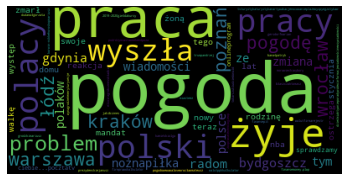

In [42]:
# STEP 1 - Import a website and print the first 100 characters.
import requests
r = requests.get("https://www.wp.pl")
r.text[:100]

# STEP 2 - Remove any style, script, document, head and title content of the webpage
# Split the words into list and print them: With punctuation; Without punctuation
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')

import re
def visible(element):
    if element.parent.name in ['style', 'script', '[document]', 'head', 'title']:
        return False
    elif re.match('<!--.*-->', str(element.encode('utf-8'))):
        return False
    return True

page_text_list = []
for t in filter(visible, soup.findAll(text=True)):
    page_text_list.append(t)

page_text = "".join(page_text_list)
page_text[:80]

page_words = page_text.split()
print(len(page_words), page_words[:10])

import string
page_words2 = [w.strip(string.punctuation).lower() for w in page_words if
len(w.strip(string.punctuation))>0]
print(len(page_words2), page_words2[:10])

# STEP 3 - Do the WORDCOUNT analysis and print the first 10 results
from collections import Counter
page_word_freq = Counter(page_words2).most_common()
print(len(page_word_freq), page_word_freq[:10])

# STEP 4 - Generate the WORDCLOUD with maximum 100 words
%pylab inline
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
dict_page_word_freq = {}
for i in page_word_freq:
    dict_page_word_freq[i[0]]=i[1]
wordcloud = WordCloud(max_words=100).fit_words(dict_page_word_freq)
plt.imshow(wordcloud)
plt.axis("off")

# STEP 5 - Exclude all stop words and generate the WORDCLOUD. (https://www.ranks.nl/stopwords)
ENGLISH_STOP_WORDS = ["a", "about", "above", "across", "after", "afterwards",
"again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves"]

POLISH_STOP_WORDS = ['a','ach','aj','albo','bardzo','bez','do','być','ci','cię','ciebie',
                     'co','czy','daleko','dla','dlaczego','dlatego','do','dobrze','dokąd',
                     'dość','dużo','dwa','dwaj','dwie','dwoje','dziś','dzisiaj','gdyby','gdzie',
                     'go','i','ich','ile','im','inny','ja','ją','jak','jakby','jaki','je','jeden',
                     'jedna','jedna','jedno','jego','jej','jemu','jeśli','jest','jestem','jeżeli',
                     'już','każdy','kiedy','kierunku','kto','ku','lub','ma','mają','mam','mi',
                     'mną','mnie','moi','mój','moja','moja','może','mu','my','na','nam','nami',
                     'nas','nasi','nasz','nasza','nasze','natychmiast','nią','nic','nich','nie',
                     'niego','niej','niemu','nigdy','nim','nimi','niż','o','obok','od','około','on',
                     'ona','one','oni','ono','owszem','po','pod','ponieważ','przed','przedtem',
                     'są','sam','sama','się','skąd','tak','taki','tam','ten','to','tobą','tobie',
                     'tu','tutaj','twoi','twój','twoja','twoje','ty','tylko','w','wam','wami','was','wasi',
                     'wasz','wasza','wasze','we','więc','wszystko','wtedy','wy','żaden','zawsze','z',
                     'za','że'
                    ]

word_freq_no_stop = [w for w in page_word_freq if w[0] not in POLISH_STOP_WORDS and not w[0].isdigit()]
dict_word_freq_no_stop = {}
for i in word_freq_no_stop:
    dict_word_freq_no_stop[i[0]]=i[1]

wordcloud = WordCloud(max_words=100).fit_words(dict_word_freq_no_stop)
#plt.figure(figsize=[13,10])
plt.imshow(wordcloud)
plt.axis("off")



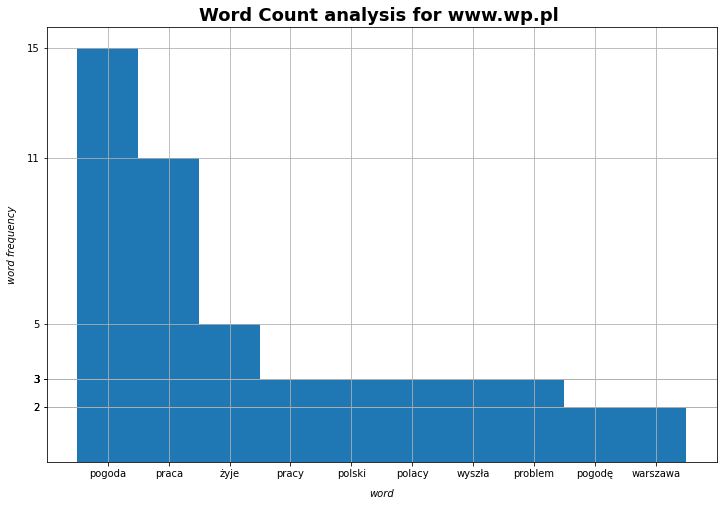

In [43]:
#########################################
# HISTOGRAM #
import numpy as np
import matplotlib.pyplot as plt
#top=page_word_freq[:5]
top=word_freq_no_stop[:10]
labels, ys = zip(*top)
xs = np.arange(len(labels))
width = 1
plt.figure(figsize=[12,8])
plt.bar(xs, ys, width, align='center')
plt.xticks(xs, labels)
plt.yticks(ys)
plt.grid(True)
plt.xlabel('word', labelpad=10, style='italic')
plt.ylabel('word frequency', labelpad=10, style='italic')
plt.title('Word Count analysis for www.wp.pl ', fontsize=18, fontweight='bold')
plt.show()